# 2d phase space plotting example 

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generate dataset

random_angles = np.random.rand(200) * 2 * np.pi 
X_0 = np.hstack((np.sin(random_angles).reshape(-1,1), np.cos(random_angles).reshape(-1,1))) * np.random.rand(200).reshape(-1,1)
X_1 = np.hstack((np.sin(random_angles).reshape(-1,1), np.cos(random_angles).reshape(-1,1))) * (np.random.rand(200).reshape(-1,1) + 0.6)

y_0 = np.zeros((np.size(X_0, axis=0), 1))
y_1 = np.ones((np.size(X_1, axis=0), 1))

X = np.vstack((X_0, X_1))
y = np.vstack((y_0, y_1))

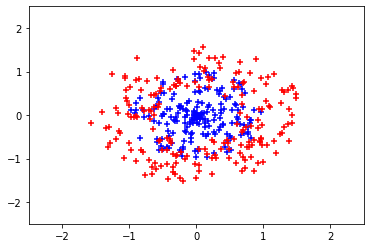

In [3]:
# Visualise dataset

plt.scatter(X_0[:, 0], X_0[:, 1], c='blue', marker='+')
plt.scatter(X_1[:, 0], X_1[:, 1], c='red', marker='+')
plt.xlim(-2.5, 2.5)
plt.ylim(-2.5, 2.5)
plt.show()

## Using tanh activation for hidden layers

In [3]:
class MlpBinaryClassifier(nn.Module):
  def __init__(self):
    super(MlpBinaryClassifier, self).__init__()
    
    self.L1 = nn.Linear(2,4)
    self.L2 = nn.Linear(4,4)
    self.L3 = nn.Linear(4,1)

  def forward(self, input_data): 
    #  perform operations on input_data here
    x = F.tanh(self.L1(input_data))
    x = F.tanh(self.L2(x))
    x = F.sigmoid(self.L3(x))
    return x

def __call__(self, input_data):
    self.forward(input_data)

In [4]:
net = MlpBinaryClassifier()

print(net)

MlpBinaryClassifier(
  (L1): Linear(in_features=2, out_features=4, bias=True)
  (L2): Linear(in_features=4, out_features=4, bias=True)
  (L3): Linear(in_features=4, out_features=1, bias=True)
)


0 tensor(0.7309, grad_fn=<BinaryCrossEntropyBackward>)


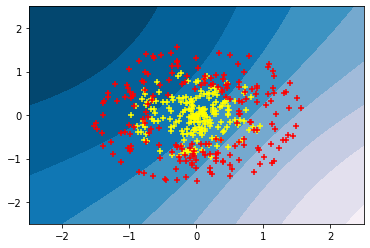

500 tensor(0.5721, grad_fn=<BinaryCrossEntropyBackward>)


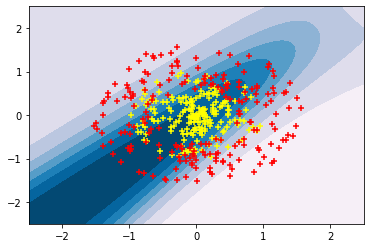

1000 tensor(0.3553, grad_fn=<BinaryCrossEntropyBackward>)


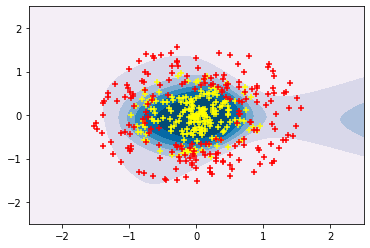

1500 tensor(0.3371, grad_fn=<BinaryCrossEntropyBackward>)


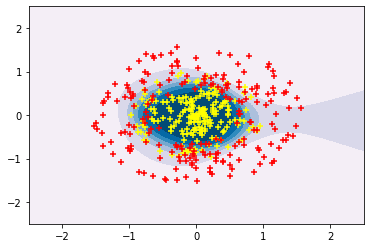

In [5]:
from IPython.display import clear_output
from matplotlib import cm

optimizer = optim.Adam(net.parameters())
cross_entropy_loss = nn.BCELoss() # BCELoss = binary cross-entropy loss (for single-label, binary, classification problems) 

X_tensor = torch.tensor(X, dtype=torch.float32, device=torch.device('cpu'))
y_tensor = torch.tensor(y, dtype=torch.float32, device=torch.device('cpu'))
for i in range(2000):
  #############################################
  optimizer.zero_grad()
  output = net(X_tensor)
  loss = cross_entropy_loss(output.squeeze(), y_tensor.squeeze())
  loss.backward()
  optimizer.step()
  #############################################

  # code for interactive visualisation during training
  if i % 500 == 0:
    # clear_output()
    print(i, loss)
    x_plot = np.linspace(-2.5, 2.5, 100)
    y_plot = np.linspace(-2.5, 2.5, 100)
    xv, yv = np.meshgrid(x_plot, y_plot)
    array_points = np.concatenate((xv.reshape(*xv.shape, 1), yv.reshape(*yv.shape, 1)), axis=2).reshape(-1, 2)
    output = net.forward(torch.from_numpy(array_points).float())
    h = plt.contourf(x_plot,y_plot,output.detach().numpy().reshape(*xv.shape), cmap=cm.PuBu_r)
    plt.scatter(X_0[:, 0], X_0[:, 1], c='yellow', marker='+')
    plt.scatter(X_1[:, 0], X_1[:, 1], c='red', marker='+')
    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)
    plt.pause(1)
  
plt.show()